STATIC

# Large Images

PACKAGES

numpy
matplotlib
scikit-learn

## Introduction

**Learning Objectives**
- How to import and work with large images
- Decreasing memory load when dealing with images

Often, we encounter situations where we have to deal with very large images that are composed of many pixels. Images such as these are often difficult to process, as they can require a lot of computer memory to do so. We will explore two different strategies for dealing with this problem - decreasing resolution, and using patches from the original image.

## Dealing with Large Images

To demonstrate this problem, we can make use of the full-resolution version of the rat brain image we used in the first sub-module.

Since the file is quite large, and this is an instructional course where you may wish to use a GitHub Codespace to practise these examples. As this file is too large to be uploaded to GitHUb we will use an online, remotely-hosted copy of the image.

WARNING BOX

To process this image with Pyodide (the software that lets you code in the browser in real time), we need to slightly downscale the high resolution image as we import it. This is in the backend, so you won't see it. Even then it is slow to process and takes up a lot of memory. If you find your page refreshing and starting over, try downloading the notebook (*see resources*) and running it locally or in a CodeSpace. Doing so you will be working with the full resolution image and have fewer issues.

In order to do this, we will firstly store our image URL in a variable for ease of handling:

In [1]:
from matplotlib.pyplot import subplots, show
from matplotlib.image import imread

# URL to the remotely hosted PNG image
url = "https://media.githubusercontent.com/media/L2D-Assets/Assets/refs/heads/master/rat_brain.png"

## Importing from URLs

Next, we must bypass the validation of the server's certificate, for ease. SSL stands for Secure Sockets Layer, which is a standard way of providing an encrypted connection between a server and a client. As this is an instructional material, we are disabling this, as we trust the issuing author of the source file (ourselves).

In [2]:
import ssl

# Disable SSL verification
ssl_context = ssl._create_unverified_context()

Lastly, we must then import the function `urlopen` and the class `BytesIO`, where the former allows us to open the URL as raw binary data, and the latter wraps this into memory, simulating a file object. This allows us to work with this online, remotely-hosted large image, from its remote location. Please be patient - this step can take time, and will depend on the speed of your internet connection.

In [3]:
from urllib.request import urlopen
from io import BytesIO

# Consolidate into 'remote_image'
remote_image = BytesIO(urlopen(url, context=ssl_context).read())

NOTE BOX

This demonstrates how to read a remotely-hosted image into memory. However, if you wish to try this with a large image stored locally on your computer you can bypass the steps above and use the lines of code that is commented out in the cells below, instead of the line immediately above.

Next, we can read the image into Python, using the imread() function. However, if we do this plainly, we will receive a warning from Python indicating that the "Image size (324649360 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack." This alludes to a potential malicious file, designed to crash or cause disruption by using consuming large amounts of memory.

We can get around this by changing the maximum pixel limit, for which we will require the Image module from the Python Imaging Library (PIL). We will make use of the `MAX_IMAGE_PIXELS` class-level attribute in order to do this, as follows:

In [4]:
from PIL import Image

# Disables the decompression bomb check:
Image.MAX_IMAGE_PIXELS = 1000000000

Let's try to use `imread`, again. Please be patient, as this may take a moment to execute.

In [5]:
# Use 'remote_image' with imread:
img_hr = imread(remote_image)
# img_hr = imread('fig/rat_brain.png') # For local image processing.

In [6]:
img_hr.shape

(17360, 18701, 3)

NOTE BOX

The actual dimensions of the image are `(17360, 18701, 3)` before we downscaled it. This is what you should see if working locally or in a CodeSpace.

Now we can plot the full high-resolution image:

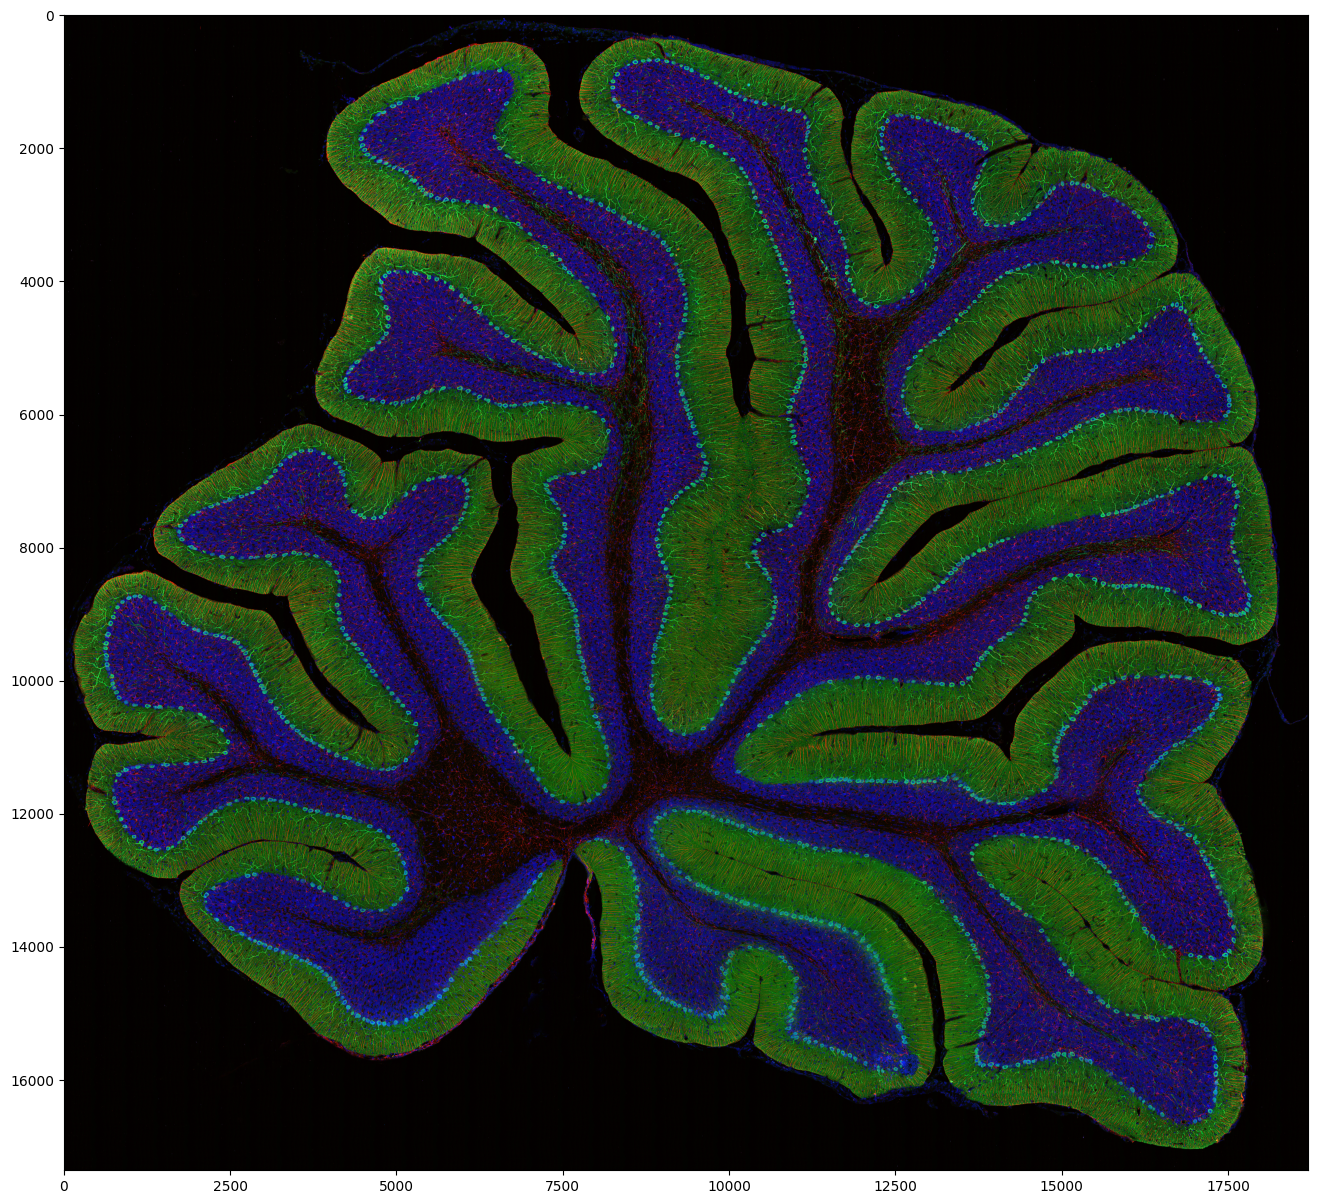

In [7]:
fig, ax = subplots(figsize=(25, 15))

ax.imshow(img_hr);

show()

## Rescaling (downsizing)

Although now we can plot this image, it does still consist of over 300 million pixels, which could run us into memory problems when attempting to process it. One approach is simply to reduce the resolution by importing the image using the Image module from the PIL library: which we imported in the code given, above. This library gives us a wealth of tools to process images, including methods to decrease an image's resolution. PIL is a very rich library with a multitude of useful tools. As always, having a look at the official [documentation](https://pillow.readthedocs.io/en/stable/) and playing around with it yourself is highly encouraged.

We can make use of the `resize` method to downsample the image, providing the desired width and height as numerical arguments, as follows:

In [8]:
# Open the remotely hosted image:
img_pil = Image.open(remote_image) 

In [9]:
# As a PIL image we can use methods such as .resize()
img_small = img_pil.resize((174, 187))

print(type(img_small))

<class 'PIL.Image.Image'>


Plotting should now be considerably quicker.

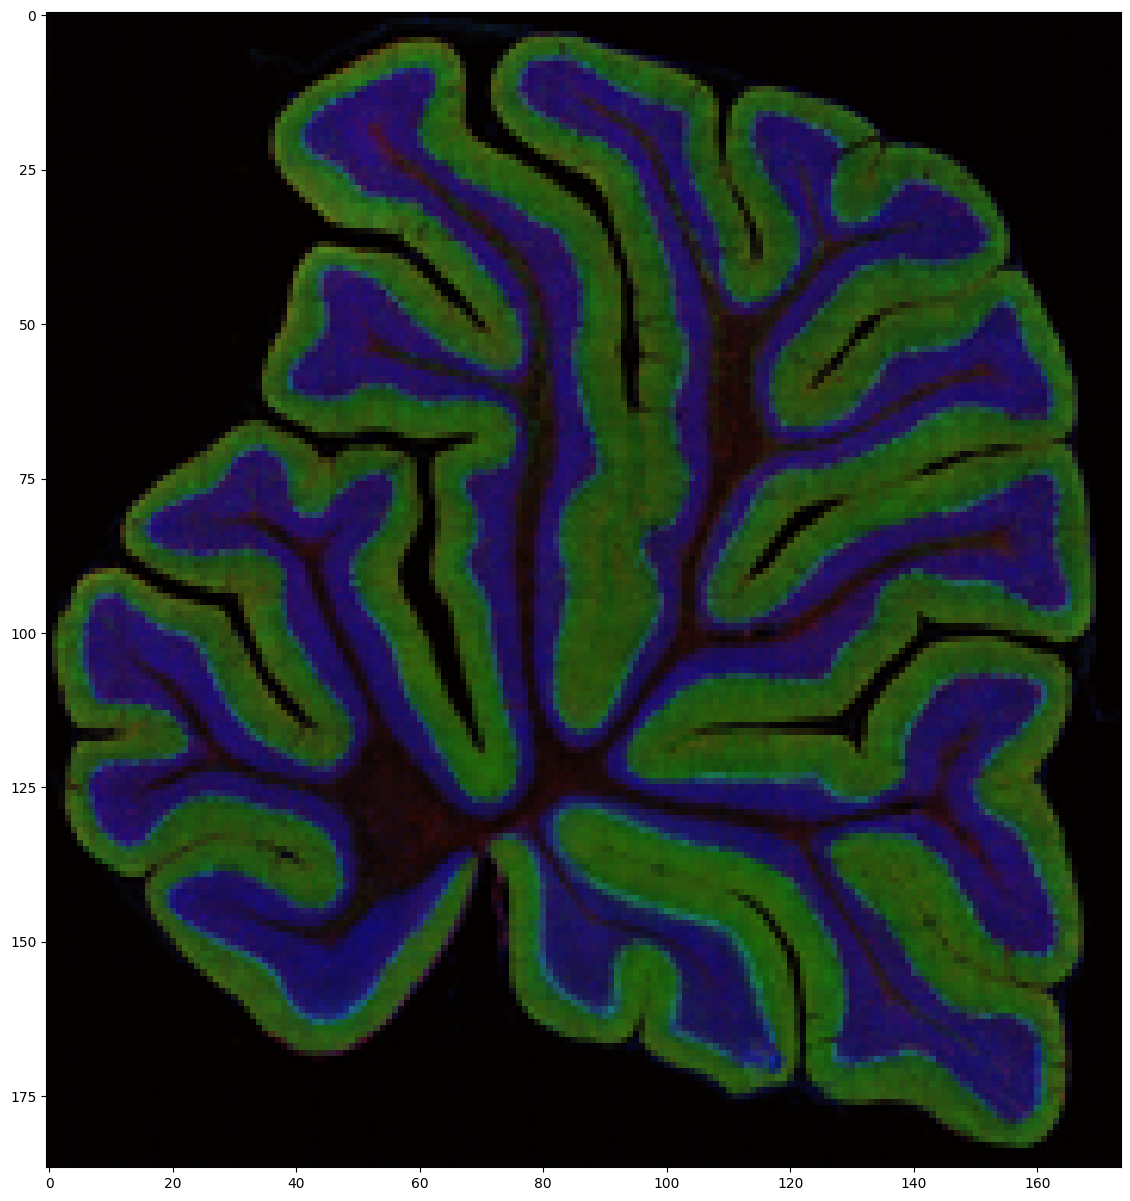

In [10]:
fig, ax = subplots(figsize=(25, 15))

ax.imshow(img_small);

show()

Using the above code, we have successfully resized the image to a resolution of 174 x 187 pixels. It is, however, important to note that our image is no longer in the format of a NumPy array, but rather it now has the type `PIL.Image.Image`. We can, however, easily convert it back into a NumPy array using the array function, if we so wish.

In [11]:
from numpy import array

img_numpy = array(img_small)

print(type(img_numpy))

<class 'numpy.ndarray'>


## Patching

Despite the above, it is often desired to keep images in their full resolution, as resizing effectively results in a loss of information. A commonly used, alternative approach to such downsampling is to **patch** the images. Patching an image essentially divides the picture up into smaller chunks that are termed patches.

For this, we can implement functionality from the [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.extract_patches_2d.html) machine learning library.

In [12]:
from sklearn.feature_extraction.image import extract_patches_2d

The `extract_patches_2d` function is used to extract parts of the image. The shape of each patch, together with the maximal number of patches, can be specified, as follows:

In [13]:
patches = extract_patches_2d(img_hr, (57, 60), max_patches=100)

# Use the below if working locally as the image will have more pixels!
# extract_patches_2d(img_hr, (174, 187), max_patches=100)

In [14]:
patches.shape

(100, 57, 60, 3)

When using the `.shape` attribute, the output given here shows that the image has been successfully subdivided into 100 patches, with resolution 57 x 60 pixels, across three channels: red, blue and green (as this is an RGB, colour image).

WARNING BOX

Patching itself can be a memory-intensive task, as the code makes a view of all possible patches into memory. Extracting lots and lots of patches may take a long time.

To look at the patches, we can make use of a for loop to iterate through the first element of the `.shape` array (the 100 patches), and visualise each one on its own subplot using the `.imshow` method, as follows:

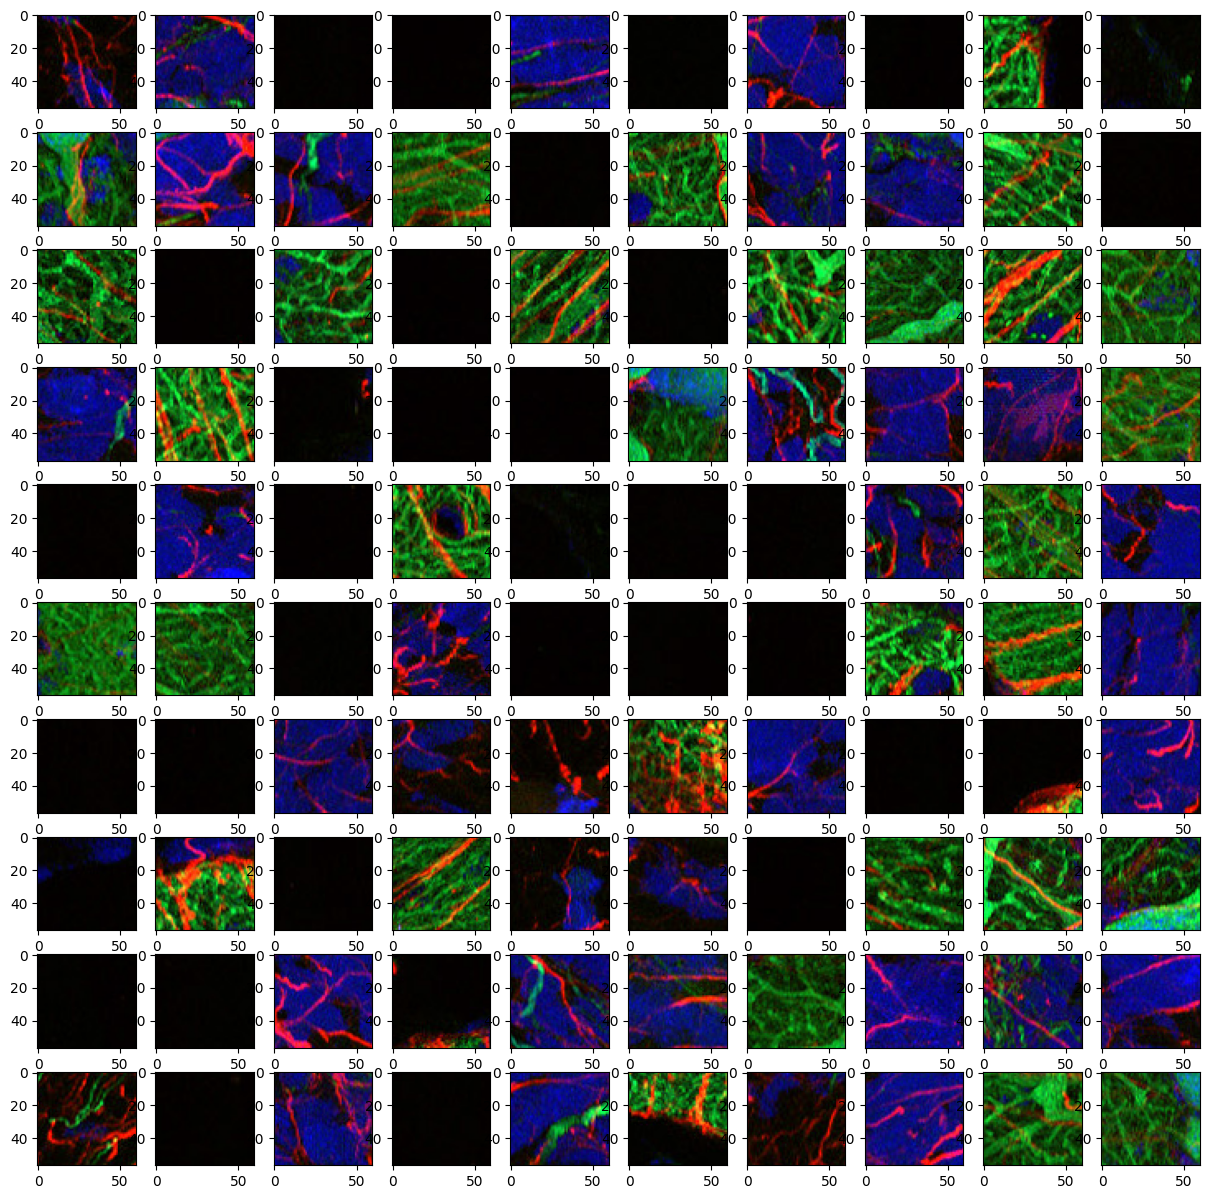

In [15]:
fig, ax = subplots(nrows=10, ncols=10, figsize=(15, 15))

ax = ax.flatten()

for index in range(patches.shape[0]):
    ax[index].imshow(patches[index, :, :, :])

show()

Working with these smaller, individual patches will be much more manageable and computationally resourceful.

## Summary

Learning to manage memory-intensive, high-resolution images through strategic downsampling and patching techniques allows us to process images that would otherwise often exceed computational limits. Downsampling reduces image resolution while maintaining overall structure, providing a quick solution when pixel-perfect detail is not essential. Alternatively, extracting smaller patches from full-resolution images preserves fine detail while simultaneously dividing the computational load into manageable chunks. These approaches can enable efficient processing of large datasets, such as whole-slide microscopy images or high-resolution fluorescence scans, without sacrificing analytical capability or requiring prohibitively powerful hardware.